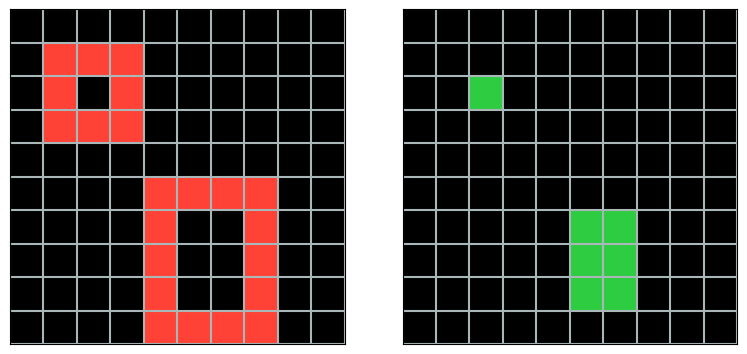

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import glob
from pathlib import Path

from basics.ARCLOADER import *
from basics.VISUALIZATION import *

# from DSL.dsl import *
from DSL.dsl2 import *
from DSL.hodel_utils import *
# from DSL.property_DSL import *
# from DSL.util_DSL import *
# from DSL.transformation_DSL import *

# from KG_definition.node import *
from KG_definition.new import *
from KG_definition.edge import *

from KG_construction.construction import *

arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list', shuffle = False, jcode = True)

x = 24    # 0 - 399      (task number)
tt = 0    # 0 or 1       (train or test)
p = 0     # 0 - max pair (pair number)
io = 0   # 0 or 1       (input or output)

# example_task = tasks[x]
example_pair = tasks[x][tt][p]
# example_grid = tasks[x][tt][p][io]

plot_data(example_pair)



In [2]:
# task
for x in range(2):
    # print(x)
    # plot_data(tasks[x][1])
    node_list = []
    
    task = Task(tasks[x])
    task.id = "task_" + str(x)
    # node_list.append(task) #########

    # pair
    for p in range(len(tasks[x][0]) + len(tasks[x][1])):
        if p < len(tasks[x][0]):
            tt = 0
            p = p
        else:
            tt = 1
            p = p - len(tasks[x][0])

        # pair = Pair(tasks[x], tt, p)
        pair = Pair(task, tt, p)

        pair.id = pair.type + "_pair_" + str(p)
        # node_list.append(pair) #########

        # grid input/output
        for io in range(2):
            if io == 0:
                txt = "input"
            else:
                txt = "output"
            if tt == 0: 
                # print(str(p),'th train pair', txt, 'grid')
                pass
            else:
                # print(str(p),'th test_pair', txt, 'grid')
                pass

            grid = Grid(tasks[x], tt, p, io)
            # print(grid.id) #######
            # print(grid.id)
            node_list.append(grid)


            # print('     object')
            # object
            for o in range(len(find_all_objects(grid.grid))):
                object = Object(grid, o, find_all_objects(grid.grid)[o])
                # print(object.id) ##########
                node_list.append(object)

                
            # print('     pixel')
            # pixel
            for row in range(grid.height):
                for col in range(grid.width):
                    pixel = Pixel(grid, row, col)
                    # print(pixel.id) #########
                    node_list.append(pixel)

plot_data(node_list[40010].grid)

for x in range(len(node_list)):
    if node_list[x].id == 40010:
        plot_data(node_list[x].grid)

# for x in range(len(node_list)):
#     if int(node_list[x].id) > 20000 and int(node_list[x].id) < 30000 and node_list[x].type == 'object':
#         print(node_list[x].grid)
#         print(node_list[x].color)



IndexError: list index out of range

In [3]:
# store the graph with node list and edge list in a pickle file
import pickle
from pathlib import Path

path = "./dump/"

# node list construction
# task
for x in range(1):
    title = Path(path + arc.itoj(x, j_codes) + '.pkl')

    node_list = []
    
    task = Task(tasks[x])
    node_list.append(task)

    # pair
    for p in range(task.num_of_ex + task.num_of_test):
        pair = Pair(task, p)
        node_list.append(pair)

        # grid
        for io in range(2):
            grid = Grid(pair, io)
            node_list.append(grid)

            # pixel
            for row in range(grid.height):
                for col in range(grid.width):
                    pixel = Pixel(grid, row, col)
                    node_list.append(pixel)

            # object
            for o in range(len(find_all_objects(grid.grid))):
                object = Object(grid, o, find_all_objects(grid.grid)[o])
                node_list.append(object)

    # Save a graph per task
    with open(title, 'wb') as f:
        pickle.dump(node_list, f)
        f.close()
  

TypeError: Pair.__init__() missing 1 required positional argument: 'p'

In [ ]:
# Load a graph
with open(title, 'rb') as f:
    g = pickle.load(f)

for node in g:
    print(node.id)

None
None
None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
None
None
1
2
3
4
5
6
7
8
9
10
11
12
None
1
2
3
4
5
6
7
8
9
10
None
None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
None
1
2
3
4
5
6
7
8
9
10
11
12
13
None
None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
None
1
2
3
4
5
6
7
8
9
10
11
12
13
None
None
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
None
1
2
3
4
5
6
7
8
9
10
11
12
13
